#Project: Write a data science blog post 

Table of Contents

  1.  Business Understanding
  2.  Data Understanding
  3.  Data Preparation
  4.  Modeling
  5.  Evaluation


### 1. Business Understanding

The dataset is from [Kaggle](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016) which contains info about across the world.The parameters are country , year , sex , HDI of the country , population , gdp of country etc. This project is associated with using this dataset as input , drawing meaningful observations and finally communicating the observations to the people.

With the given dataset , we will try to answer the following questions:

1) Which country has the highest suicide number across a total time period from 1985 to 2014  ?

2) To which age category and sex category do most people belong?

3) In which generation does it occured mostly?

4) Does it have any relation with year (proportional as with increasing time or not ) ?

5) Does the HDI have anything common with suicide number?

#2. Data Understanding

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.


In [1]:
import collections
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
file = pd.read_csv("/content/drive/My Drive/Colab Notebooks/master.csv")
df=file

Viewing the first 5 roes

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Generation means those who are born in specific time period

1) G i Gen     - 1904 - 1925

2) silent      - 1925 - 1939

3) Boomer      - 1944 - 1964

4) Gen X       - 1965 - 1979

5) Millennial  - 1980 - 1994

6) Gen Z       - 1995 - 2015


Knowing with shape

In [4]:
df.shape

(27820, 12)

Finding the general information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


Getting description so that we can know what to work with

In [6]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


Types of elements

In [7]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

#3. Data Preparation

In this we will clean the rows ,adjust the values and make the dataset usable

Column country-year doesn't have any use and can be generated from column year and column country

In [8]:
df=df.drop(file.columns[[7]],axis =1)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers


In [9]:
print(str(sum(pd.isnull(df['HDI for year'])))+ " out of "+ str(df.shape[0])+ " is Nan in HDI for year")

19456 out of 27820 is Nan in HDI for year


We can modify the hdi for year to hdi of country over the time period of 1987 to 2016 by taking the mean in each country . we are storing the modified one in different dataset along with country
Drop the rows containing hdi 0.


In [10]:
##################################################################
#correcting and giving hdi for every country
country_count = len(np.unique(list(df[df.columns[0]])))
countries_lst = np.unique(list(df[df.columns[0]]))
countries_dict={countries_lst[i]:i for i in range(country_count) }
hdi=[0.0]*country_count
count=[0.0]*country_count

for i in df.index:
    if pd.isnull(df.iloc[i,7]) == False:
        count[countries_dict[df.iloc[i,0]]] +=1
        hdi[countries_dict[df.iloc[i,0]]] += float(df.iloc[i,7])

for i in range(country_count):
    hdi[i] /= count[i] if count[i] !=0 else 1;

hdi_formated = np.array([ '%.3f' % elem for elem in hdi ])

for i in df.index:
    cntry=df.iloc[i,0]
    cntry_index=countries_dict[cntry]
    df.iloc[i,7] = hdi_formated[cntry_index]

hdi_dict={countries_lst[i]:hdi_formated[i] for i in range(country_count)}
hdi_df = pd.DataFrame(hdi_dict.items(),columns=['Country','HDI'])
hdi_df = hdi_df[hdi_df.HDI != '0.000']
hdi_df = hdi_df.sort_values('HDI',ascending= False)
hdi_df.reset_index(drop=True, inplace=True)

for i in range(hdi_df.shape[0]):
  hdi_df['HDI'][i] = float(hdi_df['HDI'][i])

hdi_df

,Country,HDI
0,Norway,0.921
1,Australia,0.913
2,Switzerland,0.909
3,Denmark,0.899
4,United States,0.892
...,...,...
85,Nicaragua,0.625
86,Azerbaijan,0.625
87,Kyrgyzstan,0.623
88,Guyana,0.608


In [11]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.650,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.650,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.650,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.650,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,0.650,"63,067,077,179",2309,Boomers


Some countries didn't gave for 2015 and 2016.
Since this is the last 2 year , we are trimming this data as it may not be accurate values

In [12]:
df=df[(df.year != 2016)]
df=df[(df.year != 2015)]
df.reset_index(drop=True, inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,0.673,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,0.673,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,0.673,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,0.673,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,0.673,"2,156,624,900",796,Boomers


#4. Modeling

In this component, we will visualise the data

In [0]:
#Defining the custom function

#horizontal Bar graph
def barh_dic(D,size=(7,10),title=""):
    plt.figure(figsize=size)
    plt.barh(*zip(*D.items()) )
    plt.title(title)
    plt.show()

#Bar graph
def bar_dic(D,size=(10,7),title=""):
    plt.figure(figsize=size)
    plt.bar(*zip(*D.items()) )
    plt.title(title)
    plt.show()

#Line Graph
def line_dic(D,size=(10,7),title=""):
    plt.figure(figsize=size)
    plt.plot(*zip(*D.items()) )
    plt.title(title)
    plt.show()

#Analyse and make dictionary with suicide and different parameters
def parameterwise_count(index,horizontal=0,title="",plot="bar",sort=1):
    parameter_count = len(np.unique(list(df[df.columns[index]])))
    
    parameter_lst = np.unique(list(df[df.columns[index]]))
    
    parameter_dict={parameter_lst[i]:i for i in range(parameter_count) }
    
    suicide_count_parameterwise_lst = np.zeros(parameter_count)
    
    for i in df.index:
        suicide_count_parameterwise_lst[parameter_dict[df.iloc[i,index]]] +=df.iloc[i,4]
    
    suicide_count_parameterwise_dict={parameter_lst[i] : suicide_count_parameterwise_lst[i] for i in range(parameter_count)}
    
    if sort:
        suicide_count_parameterwise_dict={k: v for k, v in sorted(suicide_count_parameterwise_dict.items(), key=lambda item: item[1])}
    
    if plot=="bar":
        if horizontal:
            barh_dic(suicide_count_parameterwise_dict,title=title)
        else:
            bar_dic(suicide_count_parameterwise_dict,title=title)
    else:
        line_dic(suicide_count_parameterwise_dict,title=title)
        
        
#Analyse and make dictionary with suicide_100K_pop and different parameters
def parameterwise_count_100k_pop(index,horizontal=0,title="",plot="bar"):
    parameter_count = len(np.unique(list(df[df.columns[index]])))
    
    parameter_lst = np.unique(list(df[df.columns[index]]))
    
    parameter_dict={parameter_lst[i]:i for i in range(parameter_count) }
    
    suicide_count_parameterwise_lst = np.zeros(parameter_count)
    
    for i in df.index:
        suicide_count_parameterwise_lst[parameter_dict[df.iloc[i,index]]] +=df.iloc[i,6]
    
    suicide_count_parameterwise_dict={parameter_lst[i] : suicide_count_parameterwise_lst[i] for i in range(parameter_count)}
    
    if plot=="bar":
        if horizontal:
            barh_dic(suicide_count_parameterwise_dict,title=title)
        else:
            bar_dic(suicide_count_parameterwise_dict,title=title)
    else:
        line_dic(suicide_count_parameterwise_dict,title=title)
        


###1) Which country has the highest suicide number across a total time period from 1985 to 2014 ?

Countrywise suicide rate


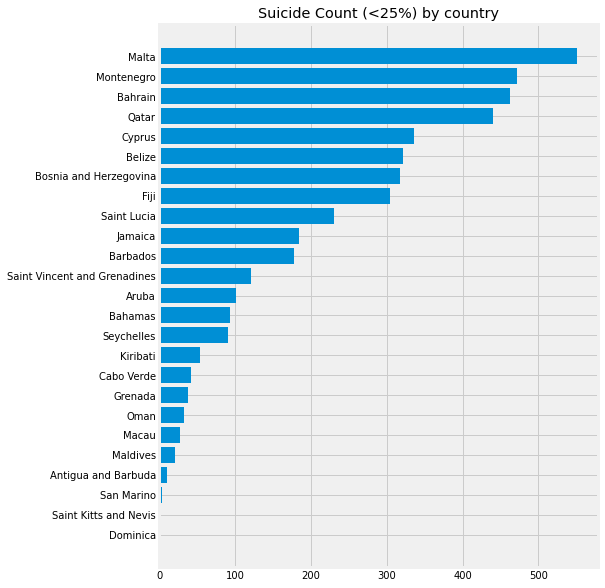

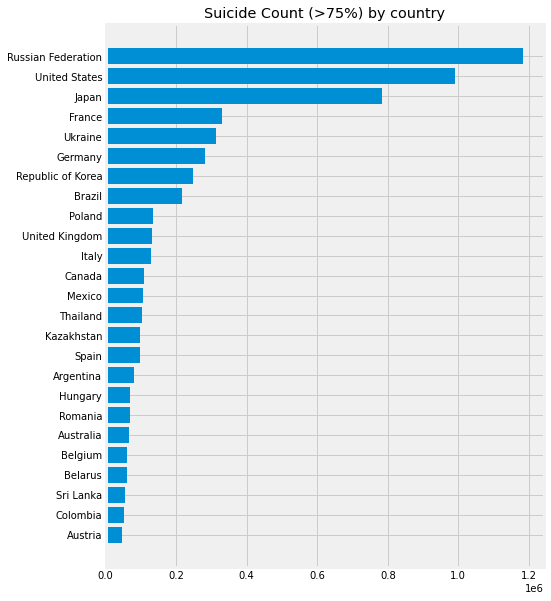

In [14]:
#countrywise suicide rate
country_count = len(np.unique(list(df[df.columns[0]])))
countries_lst = np.unique(list(df[df.columns[0]]))
countries_dict={countries_lst[i]:i for i in range(country_count) }
suicide_count_countrywise_lst = np.zeros(country_count)
    
for i in df.index:
    suicide_count_countrywise_lst[countries_dict[df.iloc[i,0]]] +=df.iloc[i,4]
    
suicide_count_countrywise_dict={countries_lst[i] : suicide_count_countrywise_lst[i] for i in range(country_count)}
#sorting
suicide_count_countrywise_dict={k: v for k, v in sorted(suicide_count_countrywise_dict.items(), key=lambda item: item[1])}
    
suicide_describe=pd.Series(suicide_count_countrywise_lst).describe()

#countries having more than 75% of suicide
suicide_count_75 = {}
for i in range(country_count):
    if(suicide_count_countrywise_dict[countries_lst[i]] > suicide_describe['75%']):
        suicide_count_75[countries_lst[i]] = suicide_count_countrywise_dict[countries_lst[i]]

#countries having less than 25% of suicide
suicide_count_25 = {}
for i in range(country_count):
    if(suicide_count_countrywise_dict[countries_lst[i]] < suicide_describe['25%']):
        suicide_count_25[countries_lst[i]] = suicide_count_countrywise_dict[countries_lst[i]]

suicide_count_25={k: v for k, v in sorted(suicide_count_25.items(), key=lambda item: item[1])}

suicide_count_75={k: v for k, v in sorted(suicide_count_75.items(), key=lambda item: item[1])}

#barh graph of 75 and 25 suicide
barh_dic(suicide_count_25,title="Suicide Count (<25%) by country")

barh_dic(suicide_count_75,title="Suicide Count (>75%) by country")



In terms of number , it is Russia , USA and Japan

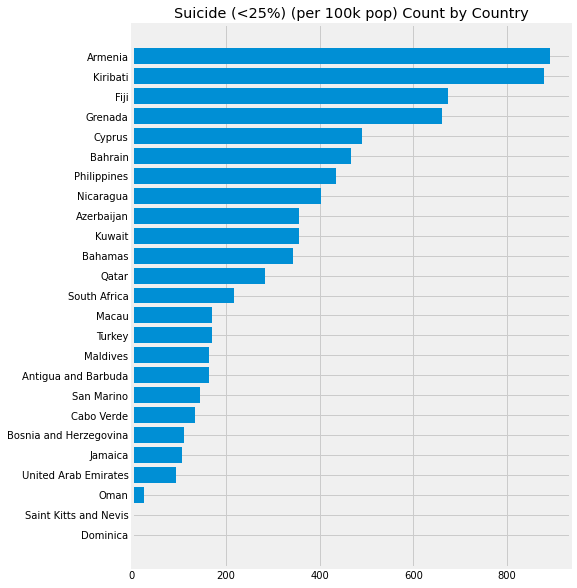

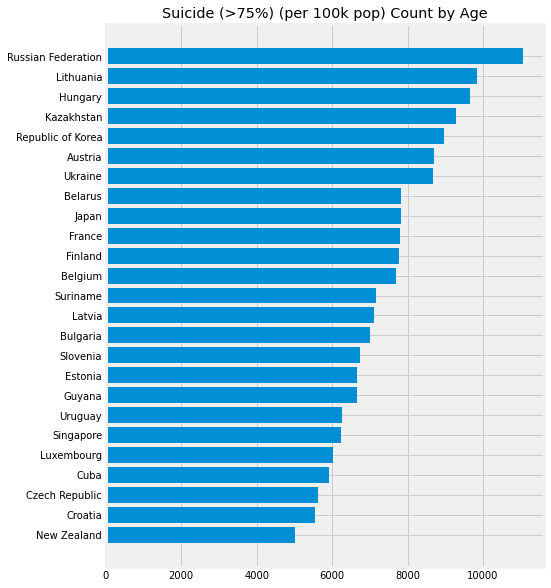

In [15]:
############################################################################################
#suicide/100k_pop and country 
country_count_100k_pop = len(np.unique(list(df[df.columns[0]])))
countries_100k_pop_lst = np.unique(list(df[df.columns[0]]))
countries_100k_pop_dict={countries_100k_pop_lst[i]:i for i in range(country_count_100k_pop) }
suicide_count_countrywise_100k_pop_lst = np.zeros(country_count_100k_pop)

for i in df.index:
    suicide_count_countrywise_100k_pop_lst[countries_100k_pop_dict[df.iloc[i,0]]] +=df.iloc[i,6]
    
suicide_count_countrywise_100k_pop_dict={countries_100k_pop_lst[i] : suicide_count_countrywise_100k_pop_lst[i] for i in range(country_count_100k_pop)}
#sorting
suicide_count_countrywise_100k_pop_dict={k: v for k, v in sorted(suicide_count_countrywise_100k_pop_dict.items(), key=lambda item: item[1])}
suicide_100k_pop_describe=pd.Series(suicide_count_countrywise_100k_pop_lst).describe()
suicide_count_100k_pop_75 = {}

for i in range(country_count_100k_pop):
    if(suicide_count_countrywise_100k_pop_dict[countries_100k_pop_lst[i]] > suicide_100k_pop_describe['75%']):
        suicide_count_100k_pop_75[countries_100k_pop_lst[i]] = suicide_count_countrywise_100k_pop_dict[countries_100k_pop_lst[i]]

#countries having less than 25% of suicide
suicide_count_100k_pop_25 = {}
for i in range(country_count_100k_pop):
    if(suicide_count_countrywise_100k_pop_dict[countries_100k_pop_lst[i]] < suicide_100k_pop_describe['25%']):
        suicide_count_100k_pop_25[countries_100k_pop_lst[i]] = suicide_count_countrywise_100k_pop_dict[countries_100k_pop_lst[i]]

suicide_count_100k_pop_25={k: v for k, v in sorted(suicide_count_100k_pop_25.items(), key=lambda item: item[1])}
suicide_count_100k_pop_75={k: v for k, v in sorted(suicide_count_100k_pop_75.items(), key=lambda item: item[1])}

#barh graph of 75 and 35 suicide
barh_dic(suicide_count_100k_pop_25,title="Suicide (<25%) (per 100k pop) Count by Country")
barh_dic(suicide_count_100k_pop_75,title="Suicide (>75%) (per 100k pop) Count by Age")

###2) To which age category and sex category do most people belong?

Agewise suicide count

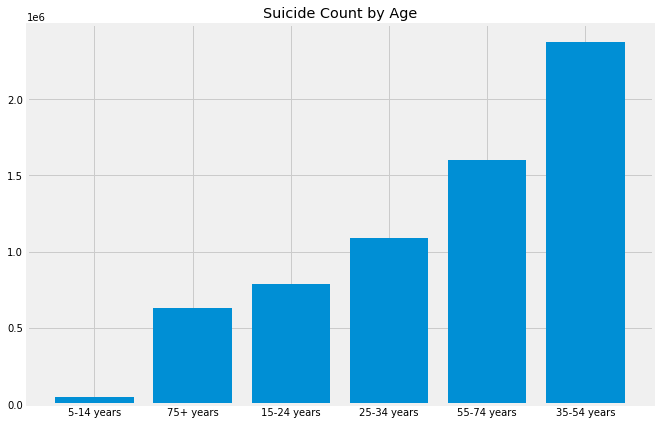

In [16]:

index=3;
title="Suicide Count by Age"
parameterwise_count(index,title=title)

Highest suicide is for 35-54 age working class

Sexwise suicide count

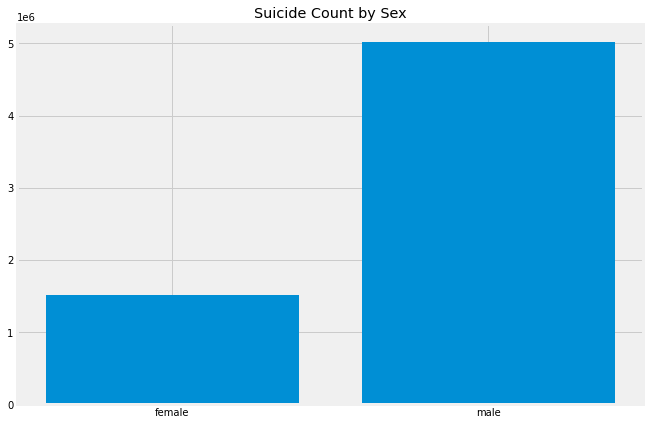

In [17]:
index=2
title="Suicide Count by Sex"
parameterwise_count(index,title=title)

Highest suicide is for males


###3) In which generation does it occured mostly?


Suicide Count by Generation

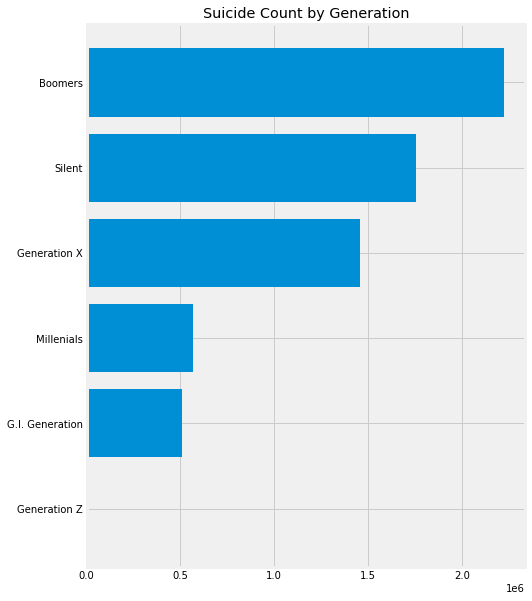

In [18]:
index = 10
title="Suicide Count by Generation"
parameterwise_count(index,horizontal=1,title=title)

Highest is among Boomers (1944 - 1964)

###4) Does it have any relation with year (proportional as with increasing time or not ) ?


Yearwise Suicide count

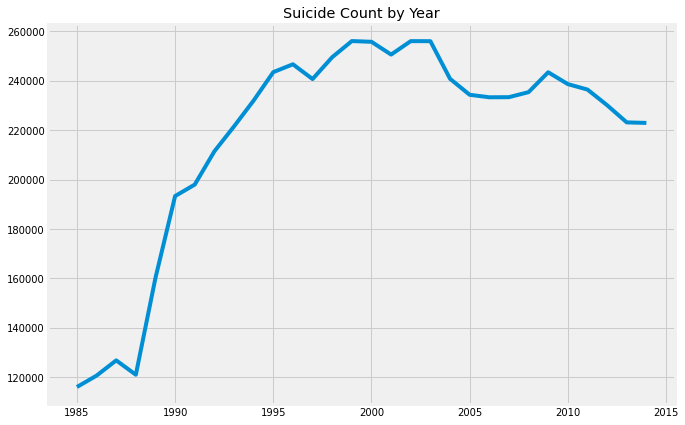

In [19]:
#yearwise Suicide count
index=1
title="Suicide Count by Year"
parameterwise_count(index,title=title,plot="line",sort=0)

Before 1990 , suicide rate was less than after 1990 and increased by twice (kind of proportional).
After 1995 , it stays above 220k level

###5) Does the HDI have anything common with suicide number?

In [0]:
hdi_df["Suicide Number"]=0
for i in range(hdi_df.shape[0]):
  hdi_df["Suicide Number"][i] = suicide_count_countrywise_dict[hdi_df["Country"][i]]

hdi_df = hdi_df.sort_values("Suicide Number",ascending =False)
hdi_df.reset_index(drop=True, inplace=True)

In [21]:
hdi_df

,Country,HDI,Suicide Number
0,United States,0.892,989824
1,Japan,0.861,783810
2,France,0.849,329127
3,Ukraine,0.714,312376
4,Germany,0.882,281174
...,...,...,...
85,Seychelles,0.755,91
86,Grenada,0.742,38
87,Oman,0.794,33
88,Maldives,0.654,20


In [0]:
lst1=[0]*hdi_df.shape[0]
lst2=[0]*hdi_df.shape[0]
for i in range(hdi_df.shape[0]):
  lst1[i] = hdi_df.iloc[i,1]
  lst2[i] = hdi_df.iloc[i,2]

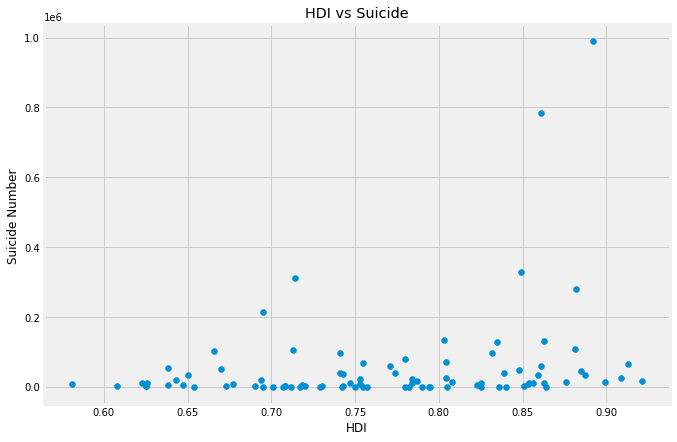

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(x=np.array(lst1),y=np.array(lst2))
plt.xlabel(("HDI"))
plt.ylabel("Suicide Number ")
plt.title("HDI vs Suicide")
plt.show()

Suicides occur in great number when HDI is more than .65 which is quite contradictory to common belief.

#5. Evaluation


Based on given data , 

Suicides occur in great number when HDI is more than .65 which is quite contradictory to common belief.

Before 1990 , suicide rate was less than after 1990 and increased by twice (kind of proportional).
After 1995 , it stays above 220k level

Highest is among Boomers (those who are born during the time1944 - 1964)

Males are most prone to this condition.

Highest suicide is for 35-54 age working class

In terms of number , highest is in Russia , USA and Japan
